# I] Import functions and options

In [131]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt

In [132]:
matplotlib.rcParams.update({'font.size':20, 'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8), 'svg.fonttype' : 'none'})

In [133]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

In [134]:
path = input_file_directory + "mefs/glucose_lactate/"

In [135]:
path2 = output_file_directory + 'ATG7/MEF/Glucose_lactate/'

In [136]:
#there are two measure per well

# II] Glucose

In [137]:
experiments = "_exp1", "_exp2", "_exp3"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "glucose" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])
    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])
    df_baf
    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_glu_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1], dfs_dmso_l[2]], axis=0) 
dfs_glu_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1], dfs_baf_l[2]], axis=0)

dfs_glu_baf

   DMSO    WT  2,285627903  2,367087339
0  DMSO    EV  1,892740779  1,909989799
1  DMSO  iso1  2,137051576  2,063587002
2  DMSO  iso2  2,186799436  2,192979329
3   BAF    WT  2,137009214  2,093682721
4   BAF    EV   1,65803912  1,663249908
5   BAF  iso1  1,494734427  1,593197596
6   BAF  iso2  1,728111004  1,793055451 

   DMSO    WT   1,64650121  1,708473456
0  DMSO    EV  2,036298082  2,036298082
1  DMSO  iso1  1,290138313  1,288603043
2  DMSO  iso2  2,260724623  2,272345588
3   BAF    WT  1,636235222  1,691514548
4   BAF    EV  1,564893044  1,516080145
5   BAF  iso1  1,241719623  1,254805661
6   BAF  iso2  2,168122671          NaN 

   DMSO    WT  0,303933738  0,296900852
0  DMSO    EV  0,242214225  0,237450889
1  DMSO  iso1  0,222247933  0,213586654
2  DMSO  iso2  0,360839518  0,349306395
3   BAF    WT  0,321635021  0,309108899
4   BAF    EV  0,230721249  0,224072072
5   BAF  iso1  0,218781918  0,213971906
6   BAF  iso2  0,381481063   0,35637208 



1,WT,EV,iso1,iso2
2,2.13701,1.65804,1.49473,1.72811
3,2.09368,1.66325,1.5932,1.79306
2,1.63624,1.56489,1.24172,2.16812
3,1.69151,1.51608,1.25481,NaN
2,0.321635,0.230721,0.218782,0.381481
3,0.309109,0.224072,0.213972,0.356372


In [138]:
#normalization on EV
dfs_glucose = dfs_glu_dmso, dfs_glu_baf
infos = "DMSO", "BAF"

dfs_glu_l = []

for i in range(len(dfs_glucose)):
    df = dfs_glucose[i]
    info = infos[i]
    
    print(info.upper())
    df = df.assign(MEF_WT = df['WT'] / df['EV'],
                   atg7_1 = df['iso1'] / df['EV'],
                   atg7_2 = df['iso2'] / df['EV'])
    
    df.reset_index(drop=True, inplace=True)
    df.loc['condition'] = info
    print(df, '\n')

    df = df.iloc[:,4:]
    df = df.rename(columns = {'MEF_WT':'MEF WT',
                              'ATG7ko':'ATG7-/-',
                              'atg7_1':'ATG7(1)',      
                              'atg7_2':'ATG7(2)'})
    
    dfs_glu_l.append(df)
df

DMSO
1                WT        EV      iso1      iso2    MEF_WT    atg7_1   atg7_2
0           2.28563   1.89274   2.13705    2.1868   1.20758   1.12908  1.15536
1           2.36709   1.90999   2.06359   2.19298   1.23932   1.08042  1.14816
2            1.6465    2.0363   1.29014   2.26072  0.808576   0.63357  1.11021
3           1.70847    2.0363    1.2886   2.27235   0.83901  0.632817  1.11592
4          0.303934  0.242214  0.222248   0.36084   1.25481  0.917568  1.48975
5          0.296901  0.237451  0.213587  0.349306   1.25037  0.899498  1.47107
condition      DMSO      DMSO      DMSO      DMSO      DMSO      DMSO     DMSO 

BAF
1                WT        EV      iso1      iso2   MEF_WT    atg7_1   atg7_2
0           2.13701   1.65804   1.49473   1.72811  1.28888  0.901507  1.04226
1           2.09368   1.66325    1.5932   1.79306  1.25879  0.957882  1.07804
2           1.63624   1.56489   1.24172   2.16812  1.04559  0.793485  1.38548
3           1.69151   1.51608   1.25481      

1,MEF WT,ATG7(1),ATG7(2)
0,1.28888,0.901507,1.04226
1,1.25879,0.957882,1.07804
2,1.04559,0.793485,1.38548
3,1.11572,0.827664,NaN
4,1.39404,0.948252,1.65343
5,1.37951,0.954924,1.59044
condition,BAF,BAF,BAF


In [139]:
# group BAF and DMSO df
df_glucose = pandas.concat([dfs_glu_l[0], dfs_glu_l[1]], axis=1)
df_glucose.columns.name = None

# Rotate and convert wide to long df
df_glucose = df_glucose.T
df_glucose.reset_index(inplace=True)

df_glucose = df_glucose.melt(id_vars=["index", "condition"], var_name="experiment")
df_glucose['value'] = df_glucose['value'].astype(float)
df_glucose = df_glucose.dropna(axis=0)

#to have consumption and not concentration
df_glucose['value'] = 1 / df_glucose['value']
df_glucose

,index,condition,experiment,value
0,MEF WT,DMSO,0,0.828105
1,ATG7(1),DMSO,0,0.885679
2,ATG7(2),DMSO,0,0.865530
3,MEF WT,BAF,0,0.775869
4,ATG7(1),BAF,0,1.109253
5,ATG7(2),BAF,0,0.959452
6,MEF WT,DMSO,1,0.806895
7,ATG7(1),DMSO,1,0.925568
8,ATG7(2),DMSO,1,0.870957
9,MEF WT,BAF,1,0.794414


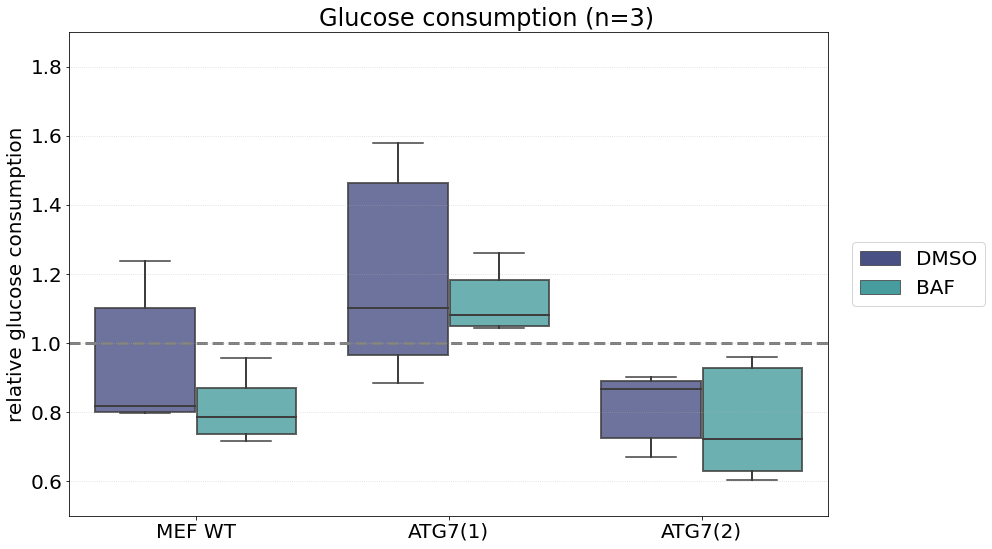

In [140]:
#graph
seaborn.boxplot(x="index", y="value", hue="condition", palette = 'mako',
                data = df_glucose, boxprops={'lw':2, 'alpha' : 0.8}, 
                medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.tight_layout()
plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative glucose consumption')
plt.ylim(0.5, 1.9)
plt.xlabel('')
plt.title('Glucose consumption' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.22, 0.5))

#save
plt.savefig(path2+'glucose_consumption.svg')

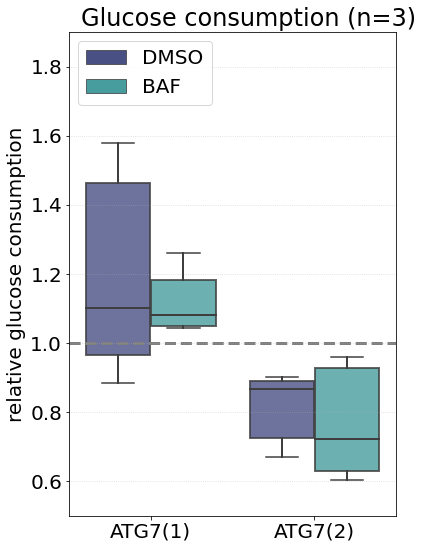

In [169]:
df_glucose2 = df_glucose[df_glucose['index'] != 'MEF WT']
df_glucose2

#graph
plt.figure(figsize=(6, 8))
fig = seaborn.boxplot(x="index", y="value", hue="condition", palette = 'mako',
                data = df_glucose2, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.tight_layout()
plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative glucose consumption')
plt.ylim(0.5, 1.9)
plt.xlabel('')
plt.title('Glucose consumption' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(0.467, 0.915))

#save
plt.savefig(path2+'glucose_consumption_noWT.svg')

In [142]:
condition = "DMSO"

print(condition.upper())   

df = df_glucose.loc[df_glucose['condition'] == condition]

df = df.sort_values(['index'], ascending = True)
df.reset_index(drop=True, inplace=True)
print(df.head(), '\n')

# define label and separate mutants
iso1_label = df.iloc[0]['index']
iso2_label = df.iloc[6]['index']
wt_label = df.loc[12]['index']

df_iso1 = df.iloc[0:6, :]
df_iso2 = df.iloc[6:12, :]
df_wt = df.iloc[12:, :]

# Statistique, Ttest
### ATG7 isoform
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_iso2['value'])
print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
### ATG7(1) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_wt['value'])
print("the pvalue between", iso1_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
### ATG7(2) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso2['value'], df_wt['value'])
print("the pvalue between", iso2_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
print('----------------','\n')


DMSO
     index condition experiment     value
0  ATG7(1)      DMSO          0  0.885679
1  ATG7(1)      DMSO          4  1.089838
2  ATG7(1)      DMSO          1  0.925568
3  ATG7(1)      DMSO          3  1.580237
4  ATG7(1)      DMSO          2  1.578356 

the pvalue between ATG7(1) and ATG7(2) is 1.75306E-02
the pvalue between ATG7(1) and MEF WT is 1.31058E-01
the pvalue between ATG7(2) and MEF WT is 2.10594E-01
---------------- 



In [143]:
condition = "BAF"

print(condition.upper())   

df = df_glucose.loc[df_glucose['condition'] == condition]

df = df.sort_values(['index'], ascending = True)
df.reset_index(drop=True, inplace=True)
print(df.head(), '\n')

# define label and separate mutants
iso1_label = df.iloc[0]['index']
iso2_label = df.iloc[6]['index']
wt_label = df.loc[11]['index']

df_iso1 = df.iloc[0:6, :]
df_iso2 = df.iloc[6:11, :]
df_wt = df.iloc[11:, :]

# Statistique, Ttest
### ATG7 isoform
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_iso2['value'])
print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
### ATG7(1) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_wt['value'])
print("the pvalue between", iso1_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
### ATG7(2) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso2['value'], df_wt['value'])
print("the pvalue between", iso2_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
print('----------------','\n')


BAF
     index condition experiment     value
0  ATG7(1)       BAF          0  1.109253
1  ATG7(1)       BAF          4  1.054572
2  ATG7(1)       BAF          1  1.043970
3  ATG7(1)       BAF          3  1.208219
4  ATG7(1)       BAF          5  1.047203 

the pvalue between ATG7(1) and ATG7(2) is 1.58506E-03
the pvalue between ATG7(1) and MEF WT is 2.02456E-04
the pvalue between ATG7(2) and MEF WT is 6.08251E-01
---------------- 



# I] Lactate

In [144]:
experiments = "_exp1", "_exp2", "_exp3"
dfs_dmso_l = []
dfs_baf_l = []

for experiment in experiments:
    file_n = "lactate" + experiment + ".csv"
    df = pandas.read_csv(path + file_n, sep = ";") #download
    print(df, '\n')
    
    df = df.T #transpose
    df.reset_index(inplace=True) #reset index
    df.iloc[2:,:] = df.iloc[2:,:].apply(lambda x: x.str.replace(',','.')) #',' to '.'
    df.iloc[2:,:] = df.iloc[2:,:].astype(float)
    
    df_dmso = df.iloc[:,:4]
    df_dmso.columns = df_dmso.iloc[1]
    df_dmso = df_dmso.drop(df_dmso.index[0:2])

    dfs_dmso_l.append(df_dmso)

    df_baf = df.iloc[:,4:]
    df_baf.columns = df_baf.iloc[1]
    df_baf = df_baf.drop(df_baf.index[0:2])

    dfs_baf_l.append(df_baf)

#concat the three experiments
dfs_lact_dmso = pandas.concat([dfs_dmso_l[0], dfs_dmso_l[1], dfs_dmso_l[2]], axis=0) 
dfs_lact_baf  = pandas.concat([dfs_baf_l[0], dfs_baf_l[1], dfs_baf_l[2]], axis=0)

dfs_lact_dmso

   DMSO    WT  2,975465182   2,90957878  2,915748744
0  DMSO    EV  2,361937633  2,423438021          NaN
1  DMSO  iso1  2,678644617  2,689600219          NaN
2  DMSO  iso2  2,941954624  2,898666563  2,918064515
3   BAF    WT  2,631933543  2,676204588          NaN
4   BAF    EV  2,108213649  2,049431856  2,068559265
5   BAF  iso1  1,944974047  1,972448752          NaN
6   BAF  iso2  2,429189892  2,385957393          NaN 

   DMSO    WT  1,869402047  1,889384144
0  DMSO    EV   2,28700129  2,289585472
1  DMSO  iso1  1,476567498  1,452776711
2  DMSO  iso2  2,887694808  2,720433041
3   BAF    WT  1,937300488  1,898147776
4   BAF    EV  1,773681215  1,781394701
5   BAF  iso1  1,421837538  1,452103711
6   BAF  iso2  2,777117441  2,696993325 

   DMSO    WT  0,228975166  0,225104245
0  DMSO    EV  0,172311847  0,175200642
1  DMSO  iso1  0,157488409  0,159071207
2  DMSO  iso2  0,283530162  0,280913178
3   BAF    WT  0,237137389  0,224779176
4   BAF    EV  0,166664217  0,164553027
5   BAF  iso

1,WT,EV,iso1,iso2
2,2.97547,2.36194,2.67864,2.94195
3,2.90958,2.42344,2.6896,2.89867
4,2.91575,NaN,NaN,2.91806
2,1.8694,2.287,1.47657,2.88769
3,1.88938,2.28959,1.45278,2.72043
2,0.228975,0.172312,0.157488,0.28353
3,0.225104,0.175201,0.159071,0.280913


In [145]:
#normalization on EV
dfs_lactate = dfs_lact_dmso, dfs_lact_baf
infos = "DMSO", "BAF"

dfs_lact_l = []

for i in range(len(dfs_lactate)):
    df = dfs_lactate[i]
    info = infos[i]
    
    print(info.upper())
    df = df.assign(MEF_WT = df['WT'] / df['EV'],
                   atg7_1 = df['iso1'] / df['EV'],
                   atg7_2 = df['iso2'] / df['EV'])
    
    df.reset_index(drop=True, inplace=True)
    df.loc['condition'] = info
    print(df, '\n')

    df = df.iloc[:,4:]
    df = df.rename(columns = {'MEF_WT':'MEF WT',
                              'ATG7ko':'ATG7-/-',
                              'atg7_1':'ATG7(1)',      
                              'atg7_2':'ATG7(2)'})
    dfs_lact_l.append(df)
    
df

DMSO
1                WT        EV      iso1      iso2    MEF_WT    atg7_1   atg7_2
0           2.97547   2.36194   2.67864   2.94195   1.25976   1.13409  1.24557
1           2.90958   2.42344    2.6896   2.89867    1.2006   1.10983   1.1961
2           2.91575       NaN       NaN   2.91806       NaN       NaN      NaN
3            1.8694     2.287   1.47657   2.88769  0.817403  0.645635  1.26266
4           1.88938   2.28959   1.45278   2.72043  0.825208  0.634515  1.18818
5          0.228975  0.172312  0.157488   0.28353   1.32884  0.913973  1.64545
6          0.225104  0.175201  0.159071  0.280913   1.28484  0.907937  1.60338
condition      DMSO      DMSO      DMSO      DMSO      DMSO      DMSO     DMSO 

BAF
1                WT        EV      iso1     iso2   MEF_WT    atg7_1   atg7_2
0           2.63193   2.10821   1.94497  2.42919  1.24842   0.92257  1.15225
1            2.6762   2.04943   1.97245  2.38596  1.30583  0.962437   1.1642
2               NaN   2.06856       NaN      Na

1,MEF WT,ATG7(1),ATG7(2)
0,1.24842,0.92257,1.15225
1,1.30583,0.962437,1.1642
2,NaN,NaN,NaN
3,1.09225,0.801631,1.56574
4,1.06554,0.81515,1.51398
5,1.42285,0.949008,1.80549
6,1.366,0.956197,1.74478
condition,BAF,BAF,BAF


In [146]:
# group BAF and DMSO df
df_lactate = pandas.concat([dfs_lact_l[0], dfs_lact_l[1]], axis=1)
df_lactate.columns.name = None

# Rotate and convert wide to long df
df_lactate = df_lactate.T
df_lactate.reset_index(inplace=True)

df_lactate = df_lactate.melt(id_vars=["index", "condition"], var_name="experiment")
df_lactate['value'] = df_lactate['value'].astype(float)
df_lactate = df_lactate.dropna(axis=0)
df_lactate

,index,condition,experiment,value
0,MEF WT,DMSO,0,1.259756
1,ATG7(1),DMSO,0,1.134088
2,ATG7(2),DMSO,0,1.245568
3,MEF WT,BAF,0,1.248419
4,ATG7(1),BAF,0,0.922570
5,ATG7(2),BAF,0,1.152250
6,MEF WT,DMSO,1,1.200600
7,ATG7(1),DMSO,1,1.109828
8,ATG7(2),DMSO,1,1.196097
9,MEF WT,BAF,1,1.305828


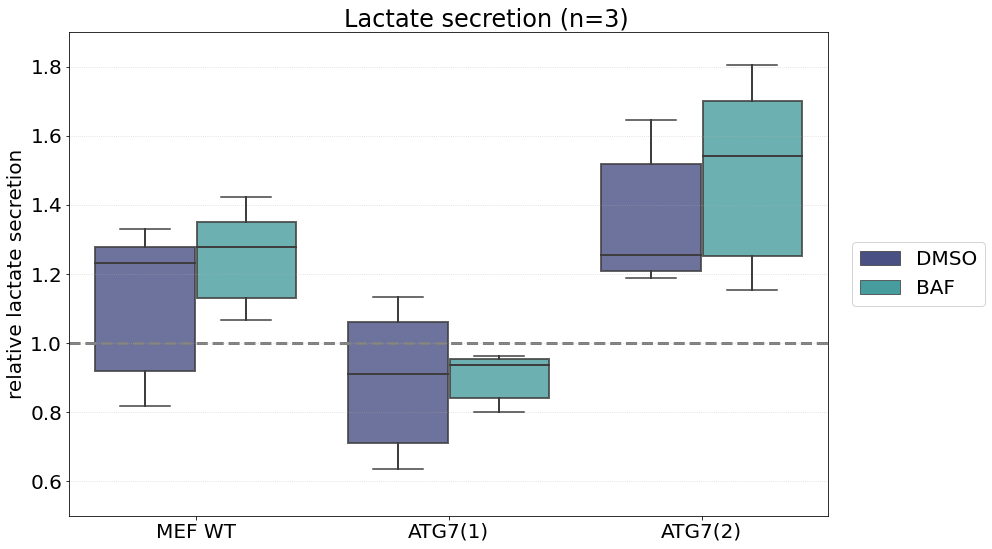

In [147]:
#graph
fig = seaborn.boxplot(x="index", y="value", hue="condition", palette = 'mako',
                data = df_lactate, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.tight_layout()
plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative lactate secretion')
plt.ylim(0.5, 1.9)
plt.xlabel('')
plt.title('Lactate secretion' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(1.22, 0.5))

#save
plt.savefig(path2+'lactate_secretion.svg')

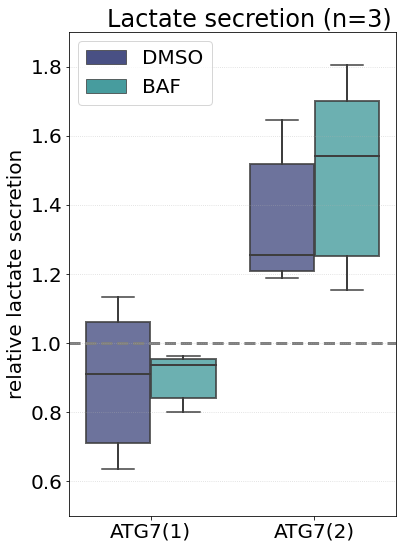

In [168]:
df_lactate2 = df_lactate[df_lactate['index'] != 'MEF WT']
df_lactate2

#graph
plt.figure(figsize=(6, 8))
fig = seaborn.boxplot(x="index", y="value", hue="condition", palette = 'mako',
                data = df_lactate2, boxprops={'lw':2, 'alpha' : 0.8}, medianprops={'lw':2}, whiskerprops={'lw':2}, 
                showcaps=True, showfliers=False)

plt.tight_layout()
plt.axhline(y=1, ls='--', lw=3, color='tab:grey', zorder=1)
plt.ylabel('relative lactate secretion')
plt.ylim(0.5, 1.9)
plt.xlabel('')
plt.title('Lactate secretion' + ' (n=3)', x=.55)
plt.legend(loc='center right', fontsize=20, bbox_to_anchor=(0.467, 0.915))

#save
plt.savefig(path2+'lactate_secretion_noWT.svg')

In [149]:
condition = "DMSO"

print(condition.upper())   

df = df_lactate.loc[df_lactate['condition'] == condition]

df = df.sort_values(['index'], ascending = True)
df.reset_index(drop=True, inplace=True)
print(df.head(), '\n')

# define label and separate mutants
iso1_label = df.iloc[0]['index']
iso2_label = df.iloc[6]['index']
wt_label = df.loc[12]['index']

df_iso1 = df.iloc[0:6, :]
df_iso2 = df.iloc[6:12, :]
df_wt = df.iloc[12:, :]

# Statistique, Ttest
### ATG7 isoform
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_iso2['value'])
print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
### ATG7(1) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_wt['value'])
print("the pvalue between", iso1_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
### ATG7(2) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso2['value'], df_wt['value'])
print("the pvalue between", iso2_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
print('----------------','\n')

DMSO
     index condition experiment     value
0  ATG7(1)      DMSO          0  1.134088
1  ATG7(1)      DMSO          5  0.913973
2  ATG7(1)      DMSO          1  1.109828
3  ATG7(1)      DMSO          4  0.634515
4  ATG7(1)      DMSO          3  0.645635 

the pvalue between ATG7(1) and ATG7(2) is 3.54501E-03
the pvalue between ATG7(1) and MEF WT is 1.10019E-01
the pvalue between ATG7(2) and MEF WT is 9.42428E-02
---------------- 



In [150]:
df

,index,condition,experiment,value
0,ATG7(1),DMSO,0,1.134088
1,ATG7(1),DMSO,5,0.913973
2,ATG7(1),DMSO,1,1.109828
3,ATG7(1),DMSO,4,0.634515
4,ATG7(1),DMSO,3,0.645635
5,ATG7(1),DMSO,6,0.907937
6,ATG7(2),DMSO,3,1.262656
7,ATG7(2),DMSO,5,1.645448
8,ATG7(2),DMSO,4,1.188177
9,ATG7(2),DMSO,6,1.603380


In [151]:
condition = "BAF"

print(condition.upper())   

df = df_glucose.loc[df_glucose['condition'] == condition]

df = df.sort_values(['index'], ascending = True)
df.reset_index(drop=True, inplace=True)
print(df.head(), '\n')

# define label and separate mutants
iso1_label = df.iloc[0]['index']
iso2_label = df.iloc[6]['index']
wt_label = df.loc[11]['index']

df_iso1 = df.iloc[0:6, :]
df_iso2 = df.iloc[6:11, :]
df_wt = df.iloc[11:, :]

# Statistique, Ttest
### ATG7 isoform
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_iso2['value'])
print("the pvalue between", iso1_label, "and", iso2_label,"is", "{:.5E}".format(pvalue))
### ATG7(1) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso1['value'], df_wt['value'])
print("the pvalue between", iso1_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
### ATG7(2) and WT
statistic, pvalue = scipy.stats.ttest_ind(df_iso2['value'], df_wt['value'])
print("the pvalue between", iso2_label, "and", wt_label,"is", "{:.5E}".format(pvalue))
print('----------------','\n')


BAF
     index condition experiment     value
0  ATG7(1)       BAF          0  1.109253
1  ATG7(1)       BAF          4  1.054572
2  ATG7(1)       BAF          1  1.043970
3  ATG7(1)       BAF          3  1.208219
4  ATG7(1)       BAF          5  1.047203 

the pvalue between ATG7(1) and ATG7(2) is 1.58506E-03
the pvalue between ATG7(1) and MEF WT is 2.02456E-04
the pvalue between ATG7(2) and MEF WT is 6.08251E-01
---------------- 

